In [210]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

# Used to find the mode
import collections


League of Legends is a game where teams of 5 players fight to take out the opposing teams' crystal "Base."
The map is almost perfectly mirrored into two sections. One side is the red team; the other side is the blue team.
It is random which side players start on, and there is no real advantage for being on either red or blue.
The main features of the map are called lanes. One red team and blue team member fights for control of the top lane.
The same happens in the middle lane, one player vs. one player.
The bottom lane is a two versus two-lane with some of the most powerful players fighting for resources.
The final spot is called the jungle.
The jungle is a dominant position where a player roams to all three lanes to create unbalanced fighting situations.
The jungler typically uses the cover of bushes and the fog of war to surprise players and kill them.
Gaining information on where the jungler is located is essential.
Usually when you get surprised by the jungler, you get killed due to the unbalanced fight.
To avoid getting killed by the jungler, people can buy wards with an opportunity cost associated with them.
People could use their in-game money to purchase items to help fight other players instead of buying wards.
Buying wards can sometimes lead to not coming back to lane with better gear.
So some players don't buy them because they would rather have the equipment because they are focused on the o
age to teams that buy them. When placed, they show inside of bushes and places that are out of the line of sight of other players where the jungler could be hiding.
They are also used to keep tabs on valuable contested resources like monsters that spawn.
Monsters give buffs and gold for the people that kill them.
The data I will be looking at for this project was found on Kagle and featured data gathered by the league of legends API
for high-level diamond-rank gameplay.
It covers only the first 10 min of the game and then shows the final result.

I believe that winning the ward battle contributes to teams winning the game. I will be exploring that idea.

In [211]:
## Loading the data set.
league_dataset = pd.read_csv("high_diamond_ranked_10min.csv")

In [212]:
## EDA Section
## Testing for NAN values.
# Ward placement
print("For {}: We found {} null values.".format("Blue Wards Placed", league_dataset.blueWardsPlaced.isnull().sum()))
print("For {}: We found {} null values.".format("Red Wards Placed", league_dataset.blueWardsPlaced.isnull().sum()))

# Wards Destroyed
print("For {}: We found {} null values.".format("Blue Wards Destroyed", league_dataset.blueWardsDestroyed.isnull().sum()))
print("For {}: We found {} null values.".format("Red Wards Destroyed", league_dataset.redWardsDestroyed.isnull().sum()))

# Player kills
print("For {}: We found {} null values.".format("Blue player kills, Red player deaths", league_dataset.blueKills.isnull().sum()))
print("For {}: We found {} null values.".format("Red player kills, Blue player deaths", league_dataset.redKills.isnull().sum()))

# total gold accumulated
print("For {}: We found {} null values.".format("for total gold accumulated blue", league_dataset.blueTotalGold.isnull().sum()))
print("For {}: We found {} null values.".format("for total gold accumulated blue", league_dataset.redTotalGold.isnull().sum()))

# Team difference in gold.
print("For {}: We found {} null values.".format("Blue difference in gold.", league_dataset.blueGoldDiff.isnull().sum()))
print("For {}: We found {} null values.".format("Red difference in gold.", league_dataset.redGoldDiff.isnull().sum()))

# Blue team wins vs red team wins.
print("For {}: We found {} null values.".format("Blue vs. Red team winning.", league_dataset.blueWins.isnull().sum()))

# We did not have to fix any of the records.

## Given that ward placement is one of my main questions I am trying to work with I would have most likely omitted these records if I had found them to have missing data.
#  I also understand that at times it would be okay to fill in the average but in this case I would have still thrown them out.

For Blue Wards Placed: We found 0 null values.
For Red Wards Placed: We found 0 null values.
For Blue Wards Destroyed: We found 0 null values.
For Red Wards Destroyed: We found 0 null values.
For Blue player kills, Red player deaths: We found 0 null values.
For Red player kills, Blue player deaths: We found 0 null values.
For for total gold accumulated blue: We found 0 null values.
For for total gold accumulated blue: We found 0 null values.
For Blue difference in gold.: We found 0 null values.
For Red difference in gold.: We found 0 null values.
For Blue vs. Red team winning.: We found 0 null values.


I have chosen to ignore the data on the number of assists a team has.
I know there is an exchange in game currency for this variable.
My concern is that there is too much variability in how awards are given out when people get assists in this game.
It also does not take into account how many people assisted in getting that kill.
So I feel this would be unmanageable and would lead to duplicating results.

For Ease of grading, I will try and mark where the significant events occur in my document.

o  A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).  Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
o	Describe what the 5 variables mean in the dataset (Chapter 1).

In my dataset, there are two teams, red and blue. I will alternate between both sides for the variables I choose.
The reason for this is that I need to be able to see that the data is similar visually.
I want to ensure that there is no bias toward the team color.
Example: Blue has an advantage over red. (I don’t believe this is the case)
I expect that histograms will be similar between the two team colors.
I want to prove that the actions of the teams dictate whether or not they win.

They will include: (Alternating between blue and red teams)
Wards Placed: Wards are used to gain intel on the enemy team movements.
I feel that wards contribute to teams winning games though I am not convinced that it is a linear relationship.

Wards Destroyed: Teams can spend money and time trying to find and destroy other team’s wards.

Player kills: I suspect that warding means that the other team dies more often.
Killing other players leads to experience gained, and gold received that can be used to buy items and wards.

Total Gold: This variable is the team’s gold that was collected within the first 10 min of the game.
Gold is used to purchase wards and gear that makes your character more powerful.

The gold difference: This considers how much more gold a team has in the first 10 min of play.
The gold difference could be an indicator of winning the game. However, games last a lot longer than 10 min typically.

Winning or losing: The outcome of the game.
The goal is to predict whether or not a team wins based on the above factors.
If possible, I would like to predict this variable.
I suspect that we may need to solve this using K-Means Clustering, which I don't know will be covered in this course.


o	Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [213]:
# definition to find the mode

def FindMode(mode_data):
    # calculate the frequency of each item
    data = collections.Counter(mode_data)
    data_list = dict(data)

    # Find the highest frequency
    max_value = max(list(data.values()))
    mode_val = [num for num, freq in data_list.items() if freq == max_value]
    if len(mode_val) == len(mode_data):
       print("No mode in the list")
    else:
       print("Mode: " + ', '.join(map(str,mode_val)))

In [214]:
# Computes the fraction of scores less than or equal to your score
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

# Computes the score based on percentile
# Can be used to calculate median

def Percentile(scores, percentile_rank):
    # since this is a pandas object sort did not work with my dataframe
    scores.sort_values()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [215]:
def FindMean(data_column):
    return data_column.mean()

In [216]:
def FindMedian(data_column):
    data_sort = data_column.sort_values()
    # Finding the position of the median
    if len(data_sort) % 2 == 0:
       first_median = data_sort[len(data_sort) // 2]
       second_median = data_sort[len(data_sort) // 2 - 1]
       median = (first_median + second_median) / 2
    else:
       median = data_sort[len(data_sort) // 2]
    return median

In [217]:
def FindSpread(data_column):
    sorted = data_column.sort_values()
    minimum = min(sorted)
    maximum = max(sorted)
    spread = maximum - minimum
    return spread, maximum, minimum

In [218]:
def FindDifferenceMeanMedian(data_column):
    mean = FindMean(data_column)
    median = FindMedian((data_column))
    return median - mean


Descriptive characteristics section as follows:


In [219]:
# Building variables section
blue_Wards_Placed  = league_dataset.blueWardsPlaced
red_Wards_Placed = league_dataset.redWardsPlaced

blue_wards_destroyed = league_dataset.blueWardsDestroyed
red_wards_destroyed = league_dataset.redWardsDestroyed

blue_kills = league_dataset.blueKills
red_kills = league_dataset.redKills

blue_total_gold = league_dataset.blueTotalGold
red_total_gold = league_dataset.redTotalGold

blue_gold_diff = league_dataset.blueGoldDiff
red_gold_diff = league_dataset.redGoldDiff

blue_wins = league_dataset.blueWins

In [220]:
def DescriptiveCharacteristics(data_column, title):
    # Descriptive characteristics section.
    print("Note the none that is printing after mode is due to the object I am using to track it.\n\n")

    # Blue Wards placed
    print("---{}---".format(title))
    print("Median: {}".format(FindMedian(data_column)))
    print("Mean: {}".format(FindMean(data_column)))
    Spread, Minimum, Maximum = FindSpread(data_column)
    print("Spread: {} min: {} Max: {}\n".format(Spread, Maximum, Minimum))
    print(FindMode(data_column))
    print("Tails info: \n"
          "Median - Mean is: {}".format(FindDifferenceMeanMedian(data_column)))


In [221]:
DescriptiveCharacteristics(blue_Wards_Placed,"Blue Wards Placed")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")
DescriptiveCharacteristics(red_Wards_Placed,"Red Wards Placed")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")

DescriptiveCharacteristics(blue_wards_destroyed,"Blue Wards Destroyed")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")
DescriptiveCharacteristics(red_wards_destroyed,"Red Wards Destroyed")
print("Since the difference is positive and there is a large distance between median and mean \nI expect data that is skewed left. \n")

DescriptiveCharacteristics(blue_kills,"Blue Kills")
print("Since the difference is positive and there is a large distance between median and mean \nI expect data that is skewed left. \n")
DescriptiveCharacteristics(red_kills,"Red Kills")
print("Since there is a small distance between median and mean \nI expect data to be pretty normal. \n")

DescriptiveCharacteristics(blue_total_gold,"Blue Total Gold")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")
DescriptiveCharacteristics(red_total_gold,"Red Total Gold")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")

DescriptiveCharacteristics(blue_gold_diff,"Blue Gold Difference")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")
DescriptiveCharacteristics(red_gold_diff,"Red Gold Difference")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")

DescriptiveCharacteristics(blue_wins,"Blue Wins")
print("Since the difference is negative and there is a large distance between median and mean \nI expect data that is skewed right. \n")



Note the none that is printing after mode is due to the object I am using to track it.


---Blue Wards Placed---
Median: 20
Mean: 22.28828828828829
Spread: 245 min: 5 Max: 250

Mode: 16
None
Tails info: 
Median - Mean is: -2.288288288288289
Since the difference is negative and there is a large distance between median and mean 
I expect data that is skewed right. 

Note the none that is printing after mode is due to the object I am using to track it.


---Red Wards Placed---
Median: 16
Mean: 22.367952221884806
Spread: 270 min: 6 Max: 276

Mode: 15
None
Tails info: 
Median - Mean is: -6.367952221884806
Since the difference is negative and there is a large distance between median and mean 
I expect data that is skewed right. 

Note the none that is printing after mode is due to the object I am using to track it.


---Blue Wards Destroyed---
Median: 2
Mean: 2.824881060836117
Spread: 27 min: 0 Max: 27

Mode: 2
None
Tails info: 
Median - Mean is: -0.824881060836117
Since the difference is ne

o	Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

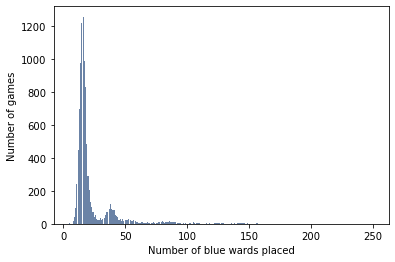

In [222]:
## Blue wards placed.
# Building a histogram wards placed vs number of games.
blue_wards_placed_histogram = thinkstats2.Hist(league_dataset.blueWardsPlaced, label="Blue Wards Placed")
thinkplot.Hist(blue_wards_placed_histogram)
thinkplot.Config(xlabel='Number of blue wards placed', ylabel='Number of games')

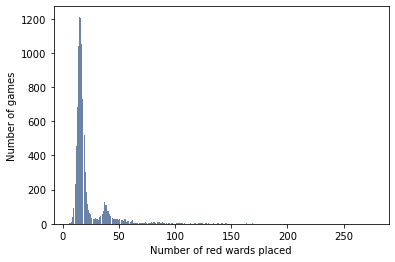

In [223]:
## Red wards placed.
# Building a histogram wards placed vs number of games.
red_wards_placed_histogram = thinkstats2.Hist(league_dataset.redWardsPlaced, label="red Wards Placed")
thinkplot.Hist(red_wards_placed_histogram)
thinkplot.Config(xlabel='Number of red wards placed', ylabel='Number of games')

The results of the histograms came out as expected. Not all players like to buy wards, so we see that the number of wards purchased is skewed right. More importantly, we are noticing that both distributions have a similar shape. It is random which side you are placed on at the beginning of the match, so I would have been surprised if they looked different from each other.


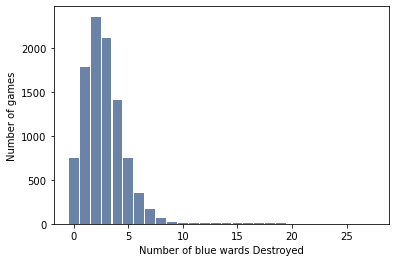

In [224]:
## Blue wards destroyed
# Building a histogram wards destroyed vs number of games.
blue_wards_destroyed_histogram = thinkstats2.Hist(league_dataset.blueWardsDestroyed, label="Blue Wards Destroyed")
thinkplot.Hist(blue_wards_destroyed_histogram)
thinkplot.Config(xlabel='Number of blue wards Destroyed', ylabel='Number of games')

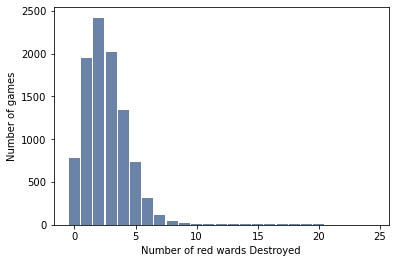

In [225]:
## Red wards destroyed
# Building a histogram wards destroyed vs number of games.
red_wards_destroyed_histogram = thinkstats2.Hist(league_dataset.redWardsDestroyed, label="Red Wards Destroyed")
thinkplot.Hist(red_wards_destroyed_histogram)
thinkplot.Config(xlabel='Number of red wards Destroyed', ylabel='Number of games')

I was not sure what to expect with this one. There are quite a few unknowns. First of all, some wards are visible and can be easily destroyed, but that requires the other team to place that ward. Its a special ward called a pink ward. It is expensive and allows you to see the other teams hidden wards and destroy them. So basically, it is a counter ward that you put down. Some players buy items that give them the ability to see wards around them for a short time so that they can destroy wards that way. I expect this data to be all over the map. (We shall see) Well, I was wrong. This data looks pretty good—another skewed right distribution. Again, you can see some wards without any effort; you have to look for them, so destroying wards happens more often than I expected. Red and blue had similar looking histograms which was as expected.


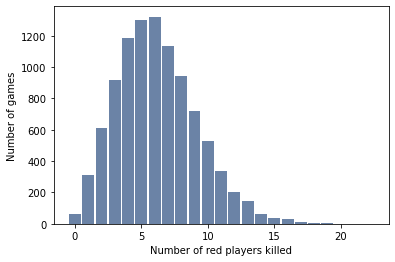

In [226]:
## Blue Player killing red players.
# Building a histogram wards destroyed vs number of games.
blue_kills = thinkstats2.Hist(league_dataset.blueKills, label="Red player deaths.")
thinkplot.Hist(blue_kills)
thinkplot.Config(xlabel='Number of red players killed', ylabel='Number of games')

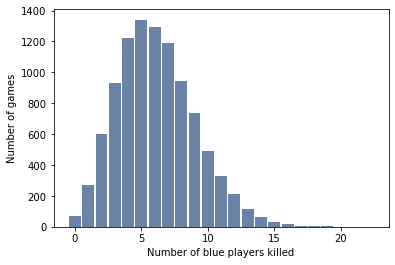

In [227]:
## Red players killing blue players.
# Building a histogram wards destroyed vs number of games.
red_kills = thinkstats2.Hist(league_dataset.redKills, label="Blue player deaths.")
thinkplot.Hist(red_kills)
thinkplot.Config(xlabel='Number of blue players killed', ylabel='Number of games')

Interestingly these graphs look to be slightly skewed right, but they are the most normal histograms we have seen so far. Blue and red have similar histogram shapes as expected.


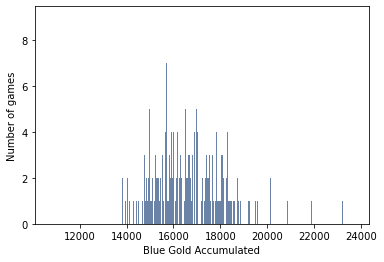

In [228]:
# Total Gold collected by blue team.
# Histogram total gold in 10 min of play vs games played.
blue_total_gold = thinkstats2.Hist(league_dataset.blueTotalGold, label="Blue team gold.")
thinkplot.Hist(blue_total_gold)
thinkplot.Config(xlabel='Blue Gold Accumulated', ylabel='Number of games')

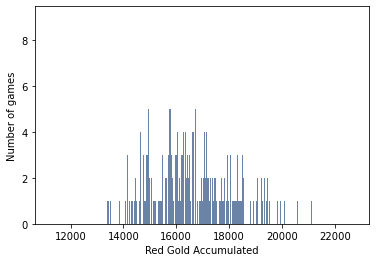

In [229]:
# Total Gold collected by red team.
# Histogram total gold in 10 min of play vs games played.
red_total_gold = thinkstats2.Hist(league_dataset.redTotalGold, label="Red team gold.")
thinkplot.Hist(red_total_gold)
thinkplot.Config(xlabel='Red Gold Accumulated', ylabel='Number of games')

Both have the same general shape. It looks skewed right, and there is a possibility of outliers.

If there is time, I will put this data into bins.

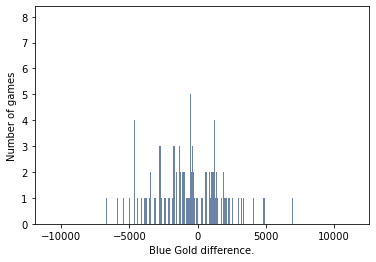

In [230]:
# Difference in gold collected.
# Histogram gold difference in 10 min of play vs games played.
blue_gold_difference = thinkstats2.Hist(league_dataset.blueGoldDiff, label="Blue team gold difference compared to red.")
thinkplot.Hist(blue_gold_difference)
thinkplot.Config(xlabel='Blue Gold difference.', ylabel='Number of games')

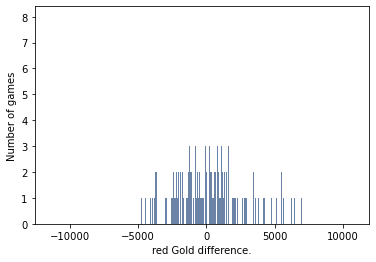

In [231]:
# Difference in gold collected.
# Histogram gold difference in 10 min of play vs games played.
red_gold_difference = thinkstats2.Hist(league_dataset.redGoldDiff, label="red team gold difference compared to blue.")
thinkplot.Hist(red_gold_difference)
thinkplot.Config(xlabel='red Gold difference.', ylabel='Number of games')

This represents how much the difference in gold is in 10 min of game play.
We will consider this as an indicator for the final outcome of the game.

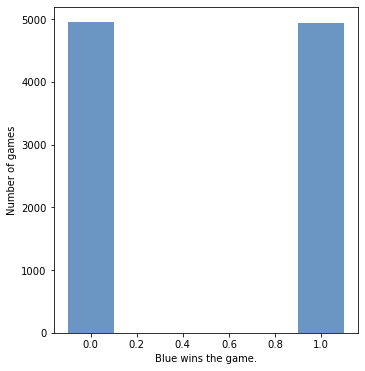

In [232]:
# Blue Wins 0 means red wins 1 means blue wins the game.
# Histogram gold difference in 10 min of play vs games played.
blue_wins = thinkstats2.Hist(league_dataset.blueWins, label="Blue team wins the game.")
thinkplot.preplot(1,cols=2)
thinkplot.Hist(blue_wins, width = .20)
thinkplot.Config(xlabel='Blue wins the game.', ylabel='Number of games', legend= None)

This is as expected. There is no advantage for starting on red team vs blue team.

I predict there will be a correlation with placing wards and gold earned.

I also think that gold earned leads to winning.

Although I actually don't expect solid linear relationships.

I suspect there is a sweet spot for how many wards a team should place to increase their chances for winning the game.

o	Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario.  Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).
o	Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).
o	Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).
o	Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).
o	Conduct a test on your hypothesis using one of the methods covered in Chapter 9.
o	For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).


